In [390]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from metric import recall5
from tqdm import tqdm

In [339]:
apply_train_df = pd.read_csv('apply_train.csv')
print(len(apply_train_df.resume_seq.unique()))
print(len(apply_train_df.recruitment_seq.unique()))
apply_train_df.sort_values(['resume_seq','recruitment_seq']).reset_index(drop=True)


8482
6695


,resume_seq,recruitment_seq
0,U00001,R04536
1,U00001,R05210
2,U00001,R05288
3,U00001,R06065
4,U00002,R01103
...,...,...
57941,U08481,R05500
57942,U08481,R06253
57943,U08482,R03633
57944,U08482,R03743


In [387]:
list(pd.DataFrame(apply_train_df.groupby('resume_seq'))[1][0]['recruitment_seq'])

['R05288', 'R05210', 'R06065', 'R04536']

In [380]:
max([len(i) for i in pd.DataFrame(apply_train_df.groupby('resume_seq'))[1]])

77

In [377]:
# 사용자-아이템 행렬 생성: 구직자가 해당 채용 공고에 지원했으면 1, 아니면 0으로 설정
user_item_matrix = apply_train_df.groupby(['resume_seq', 'recruitment_seq']).size().unstack(fill_value=0)
# user_item_matrix[user_item_matrix > 1] = 1

# 사용자 간의 유사성 계산
user_similarity = cosine_similarity(user_item_matrix) # x, yT

# 추천 점수 계산
user_predicted_scores = user_similarity.dot(user_item_matrix) / np.array([np.abs(user_similarity).sum(axis=1)]).T

In [371]:
user_similarity.shape, user_item_matrix.shape, user_predicted_scores.shape

((8482, 8482), (8482, 6695), (8482, 6695))

In [395]:
df = pd.DataFrame(user_predicted_scores,columns=sorted(list(set(apply_train_df.recruitment_seq))))

# 각 행에서 최대값 5개와 해당 열의 이름을 선택하는 함수 정의
def top_n_largest_with_column_names(row, n):
    largest_values = row.nlargest(n)
    return largest_values.index.tolist()

# 최대값 5개와 열 이름 선택
selected_columns = df.apply(top_n_largest_with_column_names, args=(100,), axis=1)

print(selected_columns)
    
# sub = pd.read_csv('./sample_submission.csv')
# sub['recruitment_seq'] = answer
# sub.to_csv('./sub.csv',index=False)

0       [R04536, R05288, R05210, R06065, R01528, R0381...
1       [R01103, R05472, R06019, R02346, R01960, R0458...
2       [R03301, R01460, R04918, R00588, R04808, R0465...
3       [R03925, R04709, R02355, R00312, R01747, R0000...
4       [R00374, R00832, R03914, R05792, R04069, R0410...
                              ...                        
8477    [R03939, R02170, R02634, R03649, R01214, R0372...
8478    [R03837, R02787, R02988, R04036, R01470, R0419...
8479    [R03152, R00803, R04970, R00083, R02912, R0577...
8480    [R00225, R06253, R05500, R01665, R05055, R0002...
8481    [R06282, R03633, R03743, R04602, R00473, R0071...
Length: 8482, dtype: object


In [397]:
for i in tqdm(range(len(selected_columns))):
    for erase in list(pd.DataFrame(apply_train_df.groupby('resume_seq'))[1][i]['recruitment_seq']):
        if erase in selected_columns[i]:
            selected_columns[i].remove(erase)
            
answer = []
for i in list(selected_columns):
    answer.extend(i[:5])

100%|██████████████████████████████████████████████████████████████████████████████| 8482/8482 [36:45<00:00,  3.85it/s]


In [400]:
sub = pd.read_csv('./sample_submission.csv')
sub['recruitment_seq'] = answer
sub.to_csv('./sub.csv',index=False)

In [49]:
pd.read_csv('./company.csv') # r
pd.read_csv('./recruitment.csv') # r
pd.read_csv('./resume.csv') # u
pd.read_csv('./resume_certificate.csv') # u
pd.read_csv('./resume_education.csv') # u
pd.read_csv('./resume_language.csv') # u

,resume_seq,language,exam_name,score
0,U01774,2,4,742.42
1,U04892,2,4,888.89
2,U01859,2,4,500.00
3,U02475,2,4,500.00
4,U03776,4,5,595.96
...,...,...,...,...
864,U04964,2,11,400.00
865,U02950,2,4,843.43
866,U05922,2,2,500.00
867,U03827,2,4,883.84


In [96]:
print(len(pd.read_csv('./company.csv'))) # r
print(len(pd.read_csv('./recruitment.csv'))) # r

r = pd.merge(pd.read_csv('./recruitment.csv'),pd.read_csv('./company.csv'),how='left').sort_values('recruitment_seq').reset_index(drop=True)
[i.split(';') for i in r['check_box_keyword']]
r

2377
6695


,recruitment_seq,address_seq1,address_seq2,address_seq3,career_end,career_start,check_box_keyword,education,major_task,qualifications,text_keyword,company_type_seq,supply_kind,employee
0,R00001,5.0,NaN,NaN,0,0,2101;2108;2201;2204;2205;2707;2810,2,2,1,NaN,5.0,201.0,631.0
1,R00002,3.0,NaN,NaN,0,0,2507;2703;2707,3,2,1,NaN,2.0,201.0,160.0
2,R00003,3.0,NaN,NaN,0,0,2101;2108;2201;2707,3,2,2,NaN,NaN,NaN,NaN
3,R00004,3.0,NaN,NaN,0,0,2507;2707,3,2,1,NaN,2.0,402.0,500.0
4,R00005,3.0,NaN,NaN,0,0,2507;2707,3,2,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,R06691,3.0,NaN,NaN,0,0,2501;2507;2707,3,2,1,NaN,NaN,NaN,NaN
6691,R06692,3.0,NaN,NaN,0,0,2201;2507,3,2,2,NaN,4.0,402.0,150.0
6692,R06693,5.0,NaN,NaN,0,0,2102;2707,4,2,1,NaN,NaN,NaN,NaN
6693,R06694,3.0,NaN,NaN,0,0,2101;2108;2109;2110;2201;2203;2707,4,2,1,NaN,NaN,NaN,NaN


In [59]:
pd.read_csv('./resume.csv')
pd.read_csv('./resume_certificate.csv')
pd.read_csv('./resume_education.csv')
pd.read_csv('./resume_language.csv')
print(len(pd.read_csv('./resume.csv')))
print(len(pd.read_csv('./resume_certificate.csv')))
print(len(pd.read_csv('./resume_education.csv')))
print(len(pd.read_csv('./resume_language.csv')))

8482
12975
8482
869


In [64]:
pd.merge(pd.read_csv('./resume.csv'),pd.read_csv('./resume_education.csv'))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8482 entries, 0 to 8481
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   resume_seq             8482 non-null   object 
 1   reg_date               8482 non-null   object 
 2   updated_date           8482 non-null   object 
 3   degree                 8482 non-null   int64  
 4   graduate_date          8482 non-null   int64  
 5   hope_salary            8482 non-null   float64
 6   last_salary            8482 non-null   float64
 7   text_keyword           8287 non-null   object 
 8   job_code_seq1          8482 non-null   object 
 9   job_code_seq2          500 non-null    object 
 10  job_code_seq3          187 non-null    object 
 11  career_month           8482 non-null   int64  
 12  career_job_code        7724 non-null   object 
 13  hischool_type_seq      8482 non-null   int64  
 14  hischool_special_type  8482 non-null   object 
 15  hisc

C:\Users\User\AppData\Local\Temp\ipykernel_17412\2356306530.py:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(udata.corr())


[0.42794063]


,resume_seq,upca1
0,U00606,0.209503
1,U00509,0.069493
2,U02012,0.206703
3,U04599,-0.139470
4,U07573,-0.229207
...,...,...
8477,U04890,0.353037
8478,U05910,-0.116491
8479,U01468,-0.307805
8480,U05315,-0.290986


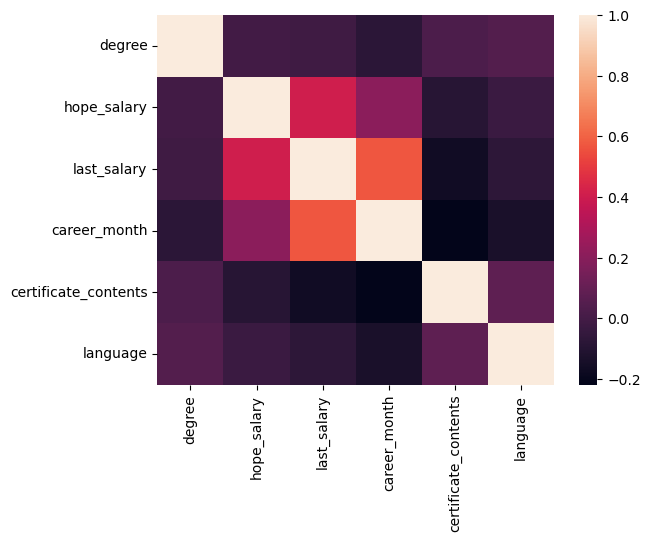

In [322]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns

udata = pd.read_csv('./resume.csv')
# udata = pd.merge(udata,pd.read_csv('./resume_certificate.csv'),how='left')
droping = ['reg_date','updated_date','graduate_date','job_code_seq2','job_code_seq3']
udata = udata.drop(droping,axis=1)

encoding = ['text_keyword','job_code_seq1','career_job_code'] # + certify encoding
udata = udata.drop(encoding,axis=1)

mg = pd.read_csv('./resume_certificate.csv').groupby('resume_seq').count().reset_index()
udata = pd.merge(udata,mg,how='left').fillna(0)
mg = pd.read_csv('./resume_language.csv').loc[:,['resume_seq','language']].groupby('resume_seq').count().reset_index()
udata = pd.merge(udata,mg,how='left').fillna(0)


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
for i in udata.columns[1:]:
    scaled_data = scaler.fit_transform(np.array(udata[i]).reshape(-1,1))
    udata[i] = scaled_data
    
sns.heatmap(udata.corr())

n_components = 1  # Number of principal components to keep
pca = PCA(n_components)
principal_components = pca.fit_transform(udata.iloc[:,1:])
print(pca.explained_variance_ratio_)

scaled_udata = udata['resume_seq']
udata = pd.concat([scaled_udata,pd.DataFrame(principal_components,columns=['upca1'])],axis=1)

udata

In [279]:
pd.merge(apply_train_df,udata)

,resume_seq,recruitment_seq,upca1,upca2
0,U05833,R03838,0.381804,0.131055
1,U05833,R00999,0.381804,0.131055
2,U05833,R03978,0.381804,0.131055
3,U05833,R02932,0.381804,0.131055
4,U06456,R02144,0.178857,0.108696
...,...,...,...,...
57941,U01026,R01783,-0.313013,0.011082
57942,U05390,R01081,-0.210092,-0.140691
57943,U05390,R02825,-0.210092,-0.140691
57944,U05310,R01365,-0.052976,-0.170170


C:\Users\User\AppData\Local\Temp\ipykernel_17412\704826841.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rdata.corr())


[0.50897918]


,recruitment_seq,rpca1
0,R02264,0.212840
1,R06317,0.150619
2,R04017,0.150619
3,R02865,0.099490
4,R04890,-0.389869
...,...,...
6690,R03678,0.150619
6691,R04593,0.201749
6692,R03252,0.150619
6693,R05130,-0.389869


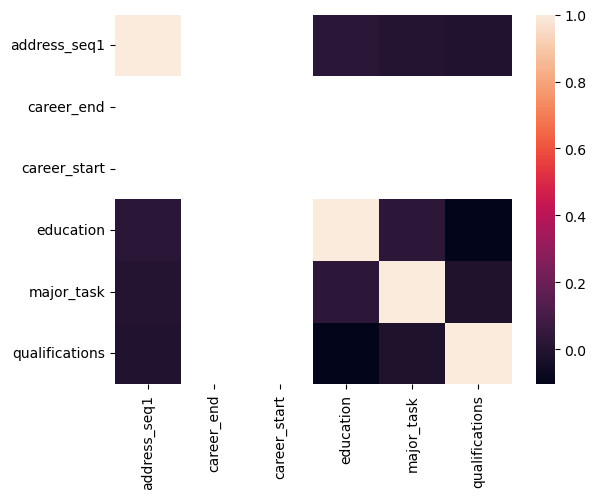

In [313]:
pd.read_csv('./company.csv') # r
rdata = pd.read_csv('./recruitment.csv') # r
encoding = ['address_seq2','address_seq3','check_box_keyword','text_keyword'] # encoding, merge
rdata = rdata.drop(encoding,axis=1)
rdata = rdata.fillna(3)


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
for i in rdata.columns[1:]:
    scaled_data = scaler.fit_transform(np.array(rdata[i]).reshape(-1,1))
    rdata[i] = scaled_data
    
sns.heatmap(rdata.corr())

n_components = 1  # Number of principal components to keep
pca = PCA(n_components)
principal_components = pca.fit_transform(rdata.iloc[:,1:])
print(pca.explained_variance_ratio_)

scaled_rdata = rdata['recruitment_seq']
rdata = pd.concat([scaled_rdata,pd.DataFrame(principal_components,columns=['rpca1'])],axis=1)

rdata

In [334]:
tp = pd.DataFrame(pd.merge(pd.merge(apply_train_df,rdata),udata).sort_values('resume_seq').groupby('resume_seq'))[1]
tp[0]

,resume_seq,recruitment_seq,rpca1,upca1
29281,U00001,R06065,0.210992,-0.101947
29280,U00001,R05288,0.210992,-0.101947
29282,U00001,R05210,-0.338740,-0.101947
29283,U00001,R04536,-0.338740,-0.101947


In [332]:
pd.DataFrame(pd.read_csv('./sample_submission.csv').groupby('resume_seq'))[1][0]

,resume_seq,recruitment_seq
0,U00001,R03134
1,U00001,R00465
2,U00001,R01931
3,U00001,R01607
4,U00001,R06059
